In [ ]:
import sys
sys.path.append('../03-code/')

from config import PROJECT_ROOT_DIRECTORY,COLUMNS_DICT
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so
from seaborn import axes_style

sns.set_context('paper')


### Feature correlation

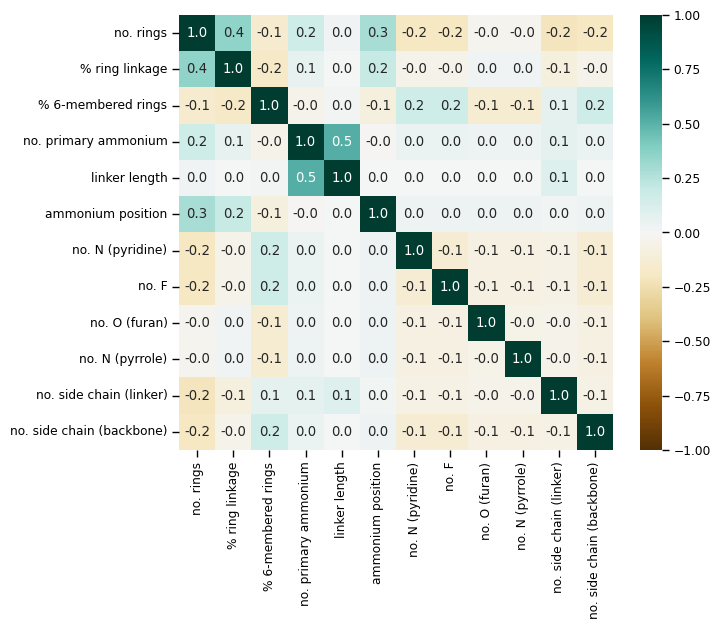

In [3]:
machine_learning_input_dataframe = pd.read_csv(
        PROJECT_ROOT_DIRECTORY + '02-metadata/06-csv-files/13-machine-learning-input-dataframe.csv',index_col=0
        )
input_feature_dataframe = machine_learning_input_dataframe[COLUMNS_DICT['machine_learning_features']]

fig_feature_correlation_heatmap = plt.figure(figsize=(7,5.65))
subfigure = fig_feature_correlation_heatmap.subfigures(1,1)
ax = subfigure.subplots(1,1)
sns.heatmap(input_feature_dataframe.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG',fmt=".1f", ax=ax)
ax.set_xticklabels(COLUMNS_DICT['molecular_fingerprint_full_names'])
ax.set_yticklabels(COLUMNS_DICT['molecular_fingerprint_full_names'])

fig_feature_correlation_heatmap.savefig('../rawfigures/feature_correlation_heatmap.svg')

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create dummy data range just for colorbar
cmap = sns.color_palette("BrBG", as_cmap=True)

fig, ax = plt.subplots(figsize=(0.3, 3))  # adjust size and orientation
norm = plt.Normalize(vmin=0, vmax=1)
cb = plt.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=ax,
)

# Remove axes for a clean colormap strip
#ax.set_axis_off() # dont remove
cb.set_label("Value")  # optional label
plt.savefig("../rawfigures/colorbar_BrBG.tiff", dpi=900, bbox_inches='tight', pad_inches=0)
plt.close(fig)

### Model performance

In [4]:
result_dir = PROJECT_ROOT_DIRECTORY + "01-rawdata/10-machine-learning/"
model_accuracy_df = pd.read_csv(result_dir + "model_accuracy.csv")
model_accuracy_df

,Model_name,Target_type,R2_score,RMSE,Train_score,Test_score
0,LinearRegression,HOMO,0.950676,0.333222,0.950021,0.953172
1,LinearRegression,LUMO,0.947085,0.266386,0.945742,0.952336
2,Lasso,HOMO,0.950658,0.333283,0.950016,0.953103
3,Lasso,LUMO,0.947059,0.266453,0.945732,0.952246
4,Ridge,HOMO,0.950675,0.333225,0.950021,0.953168
5,Ridge,LUMO,0.947077,0.266406,0.945740,0.952302
6,ElasticNet,HOMO,0.950667,0.333251,0.950019,0.953138
7,ElasticNet,LUMO,0.947072,0.266419,0.945738,0.952285
8,SVR_linear,HOMO,0.948313,0.341109,0.947777,0.950356
9,SVR_linear,LUMO,0.945896,0.269363,0.944898,0.949794


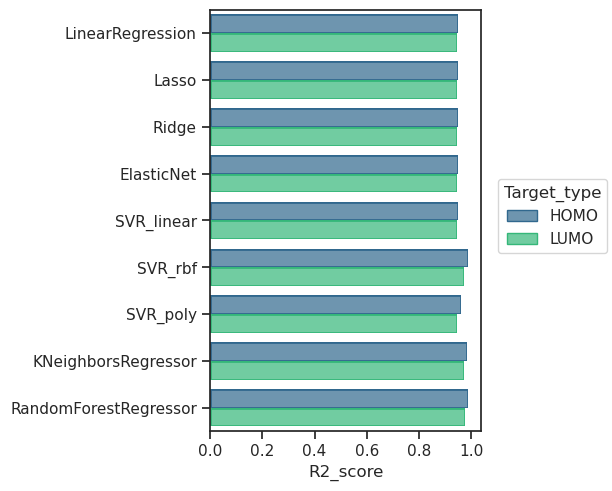

In [5]:
fig = plt.figure(
    figsize=(5,5)
    )

(
    so.Plot(data=model_accuracy_df, x='R2_score', y='Model_name', color='Target_type')
    .add(so.Bar(), so.Dodge(), orient='h')
    .label(y="")
    .scale(color='viridis')
    .theme(axes_style("ticks"))
    .on(fig)
    .plot()
    )

fig.tight_layout()
#fig.savefig('../rawfigures/model_accuracy.svg')

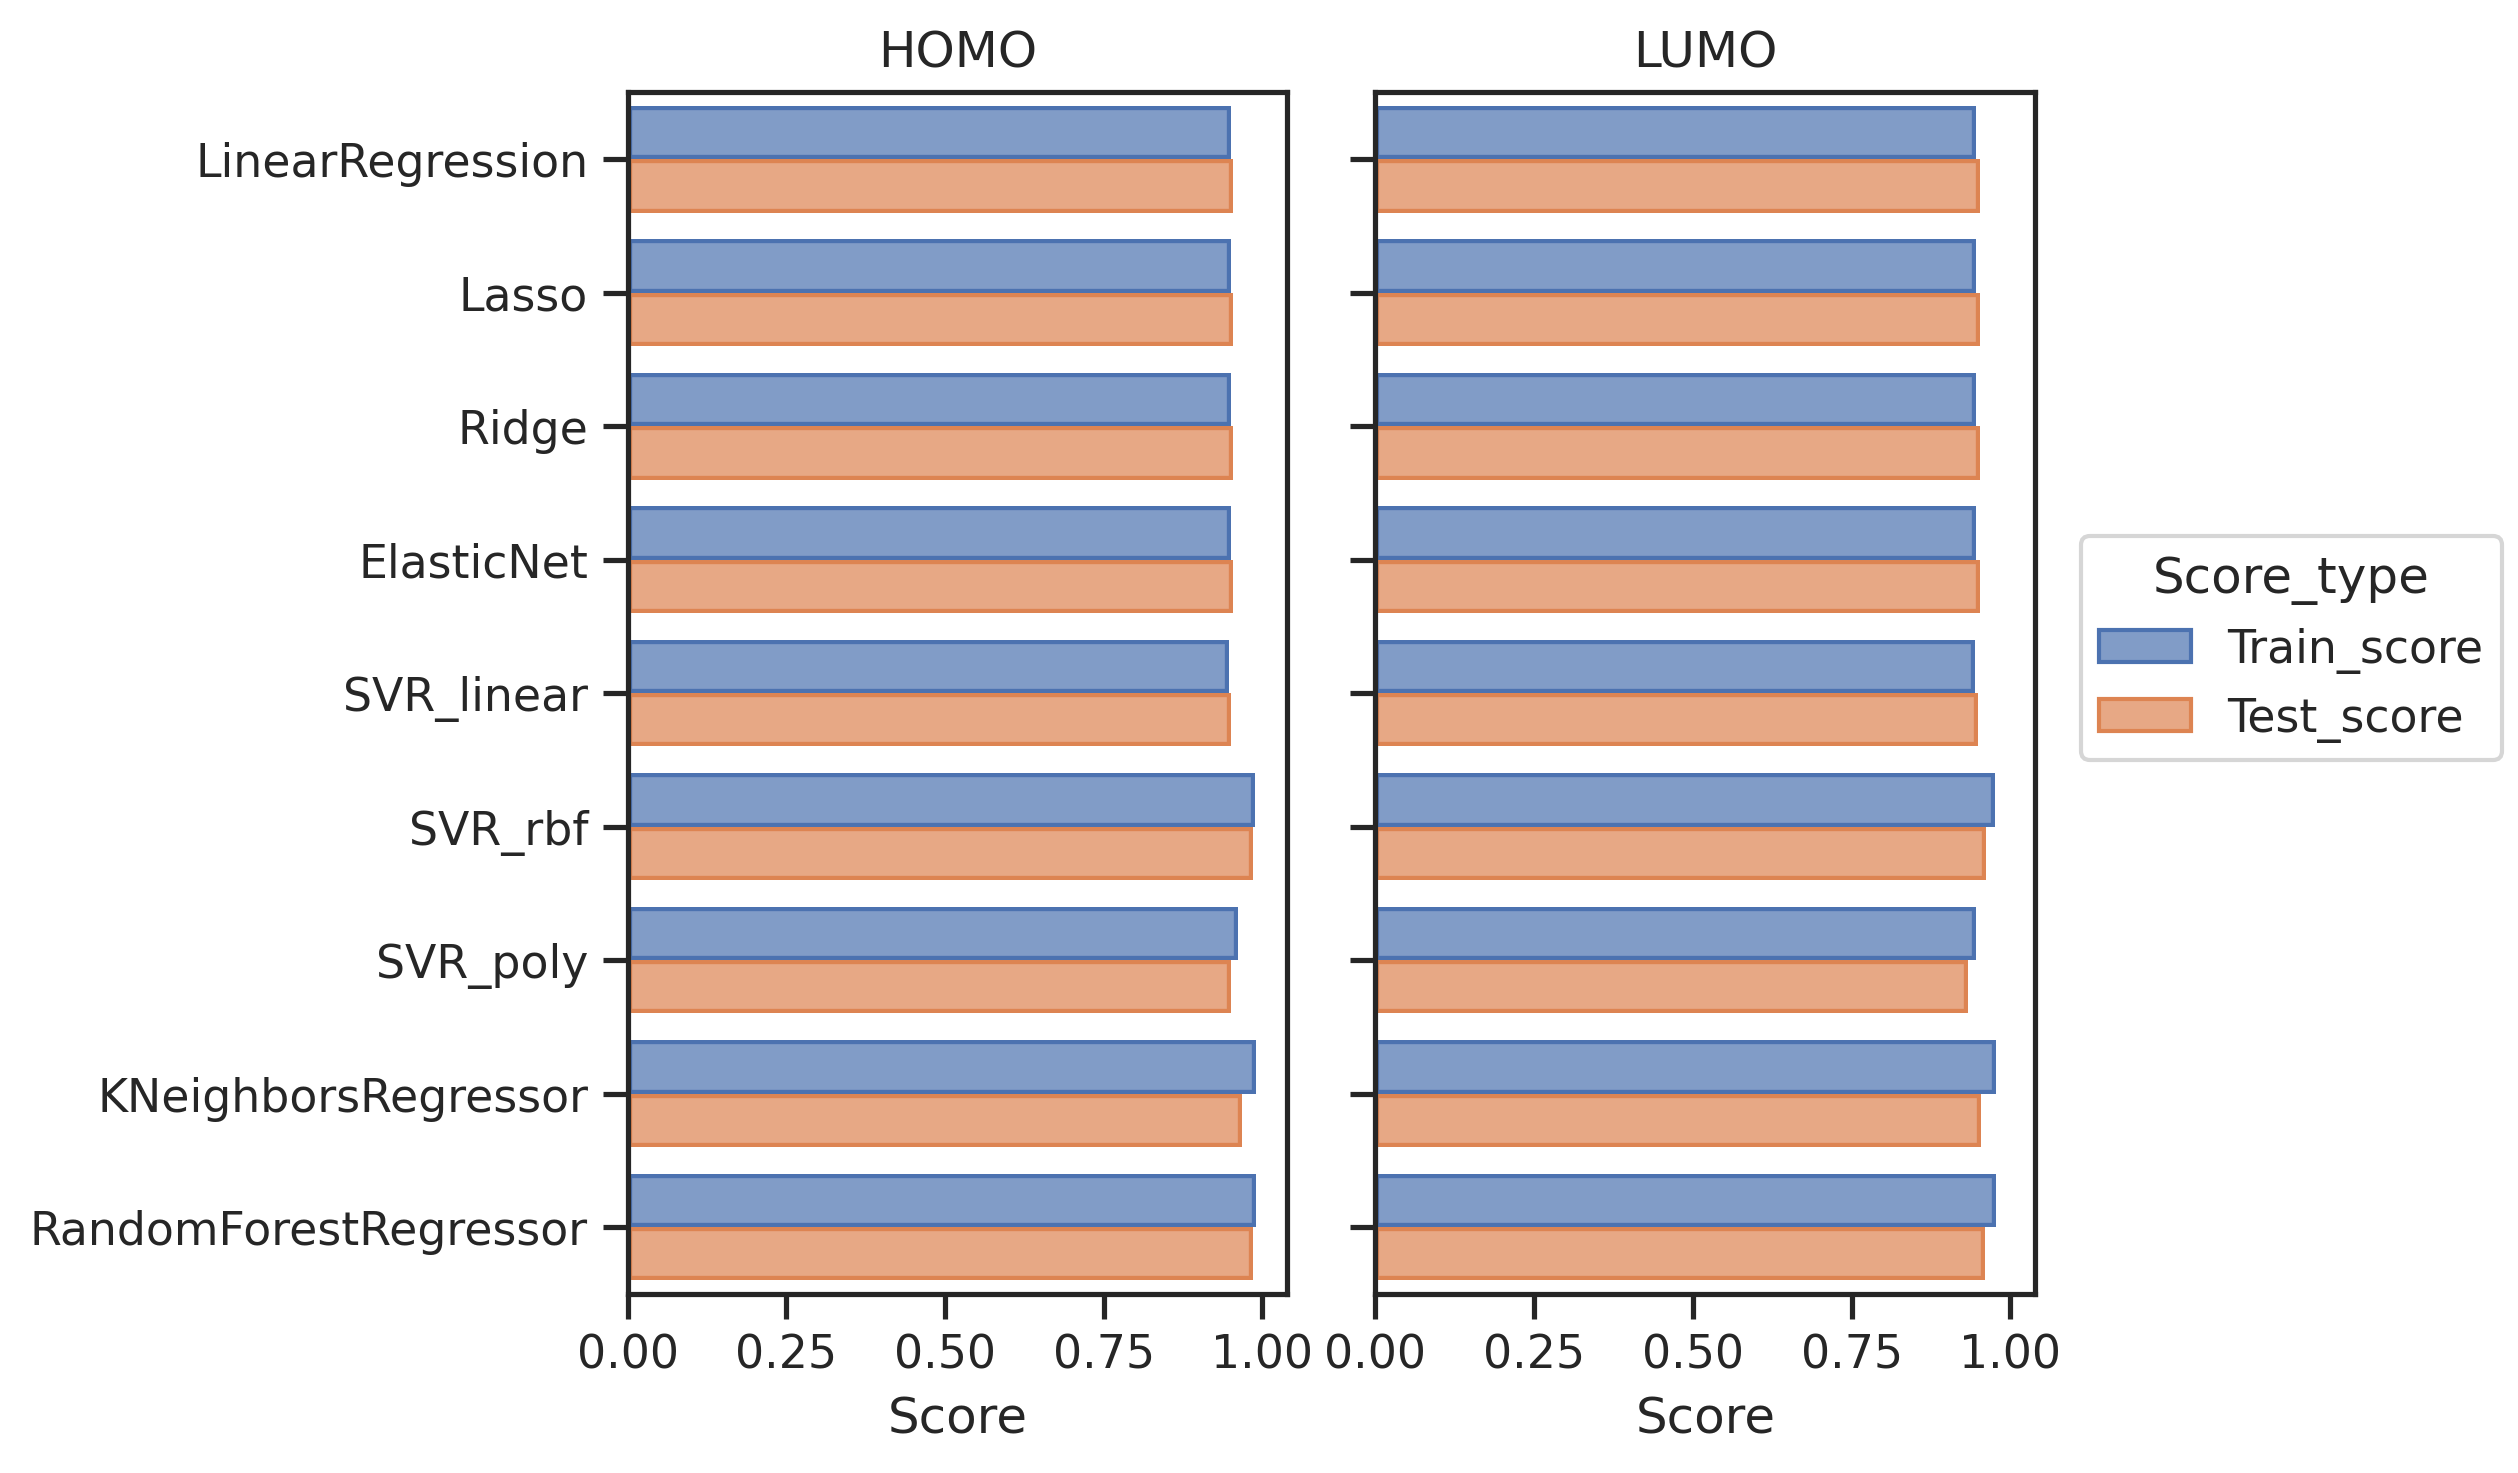

In [28]:
fig = plt.figure(figsize=(7,5))
df_melt = pd.melt(model_accuracy_df,value_vars=['Train_score','Test_score'],id_vars=['Model_name','Target_type'],
             var_name='Score_type',value_name='Score')

(
    so.Plot(data=df_melt, x='Score', y='Model_name', color='Score_type')
    .add(so.Bar(), so.Dodge(), orient='h')
    .facet(col='Target_type')
    .label(y="")
    .theme(axes_style("ticks"))
    .on(fig)
    .plot()
    )

fig.tight_layout()
#fig.savefig('../rawfigures/model_accuracy_train_test.svg')

In [6]:
HOMO_prediction_df = pd.concat([pd.read_csv(result_dir + "train-test-identifier.csv", index_col=0),
                                pd.read_csv(result_dir + "HOMO_prediction.csv", index_col=0)]
                                ,axis=1)

LUMO_prediction_df = pd.concat([pd.read_csv(result_dir + "train-test-identifier.csv", index_col=0),
                                pd.read_csv(result_dir + "LUMO_prediction.csv", index_col=0)]
                                ,axis=1)

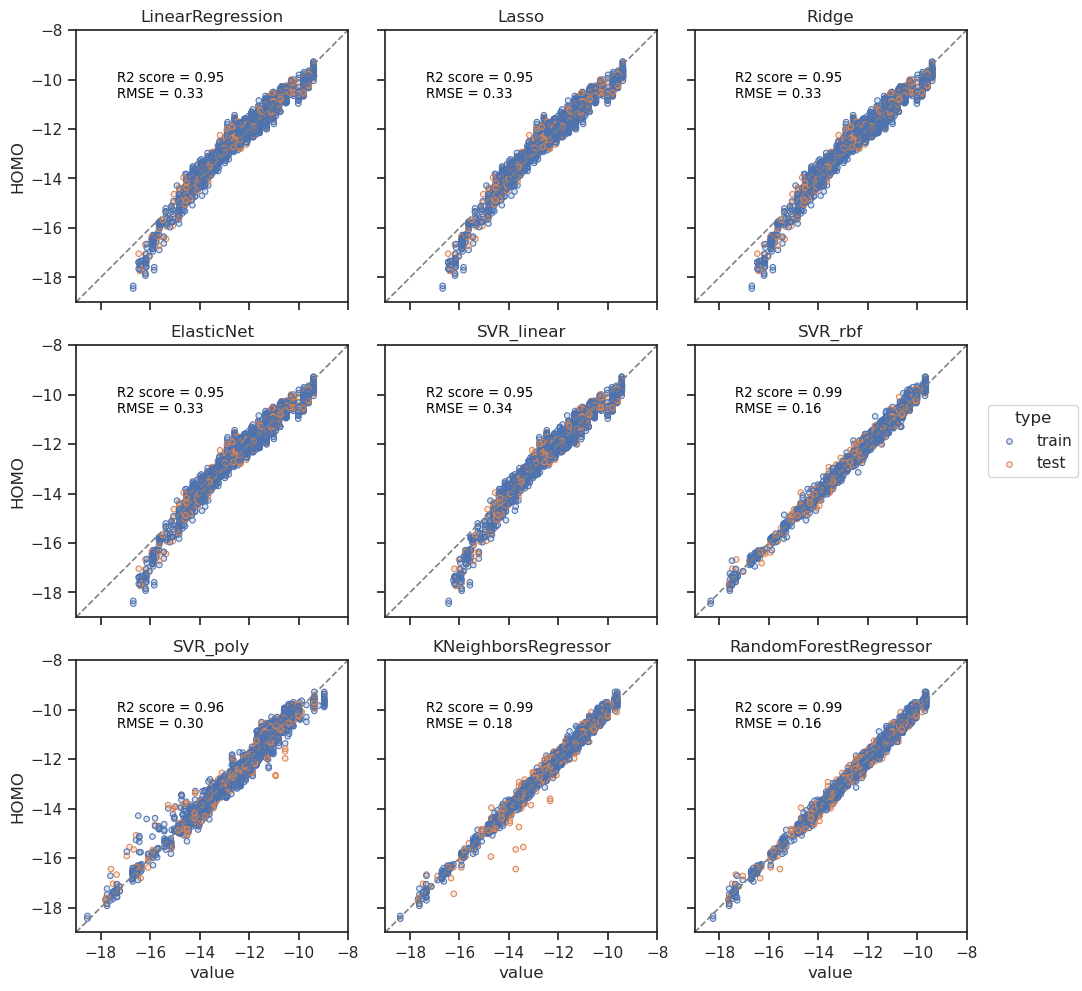

In [ ]:
axis_range = {
    'HOMO': [-19, -8],
    'LUMO': [-14, -5]
}
target='HOMO'
fig = plt.figure(figsize=(10, 10))
#subfigure = fig.subfigures(1, 1)
(
    so.Plot(data=pd.melt(HOMO_prediction_df, id_vars=[target,'type']),
        x='value', y=target, color='type')
        .facet(col='variable',wrap=3)
        .add(so.Dots())
        .limit(x=axis_range[target], y=axis_range[target])
        .layout(engine='tight')
        .theme(axes_style("ticks"))
        .on(fig)
        .plot()
        )
    
for axis_index in range(len(fig.axes)):
    ax = fig.axes[axis_index]
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    sns.lineplot(x=axis_range[target], y=axis_range[target],ax=ax,ls='--',color='grey')
    text_position_x = axis_range[target][0] + 0.15 * (axis_range[target][1] - axis_range[target][0])
    text_position_y = axis_range[target][0] + 0.75 * (axis_range[target][1] - axis_range[target][0])
    r2_score = model_accuracy_df.loc[axis_index*2, 'R2_score']
    rmse = model_accuracy_df.loc[axis_index*2, 'RMSE']
    text_to_display = 'R2 score = ' + "{:.2f}".format(r2_score) + '\nRMSE = ' + "{:.2f}".format(rmse)
    ax.text(x=text_position_x, y=text_position_y, s=text_to_display)
 
#fig.savefig('../rawfigures/HOMO_model_predictions.svg')

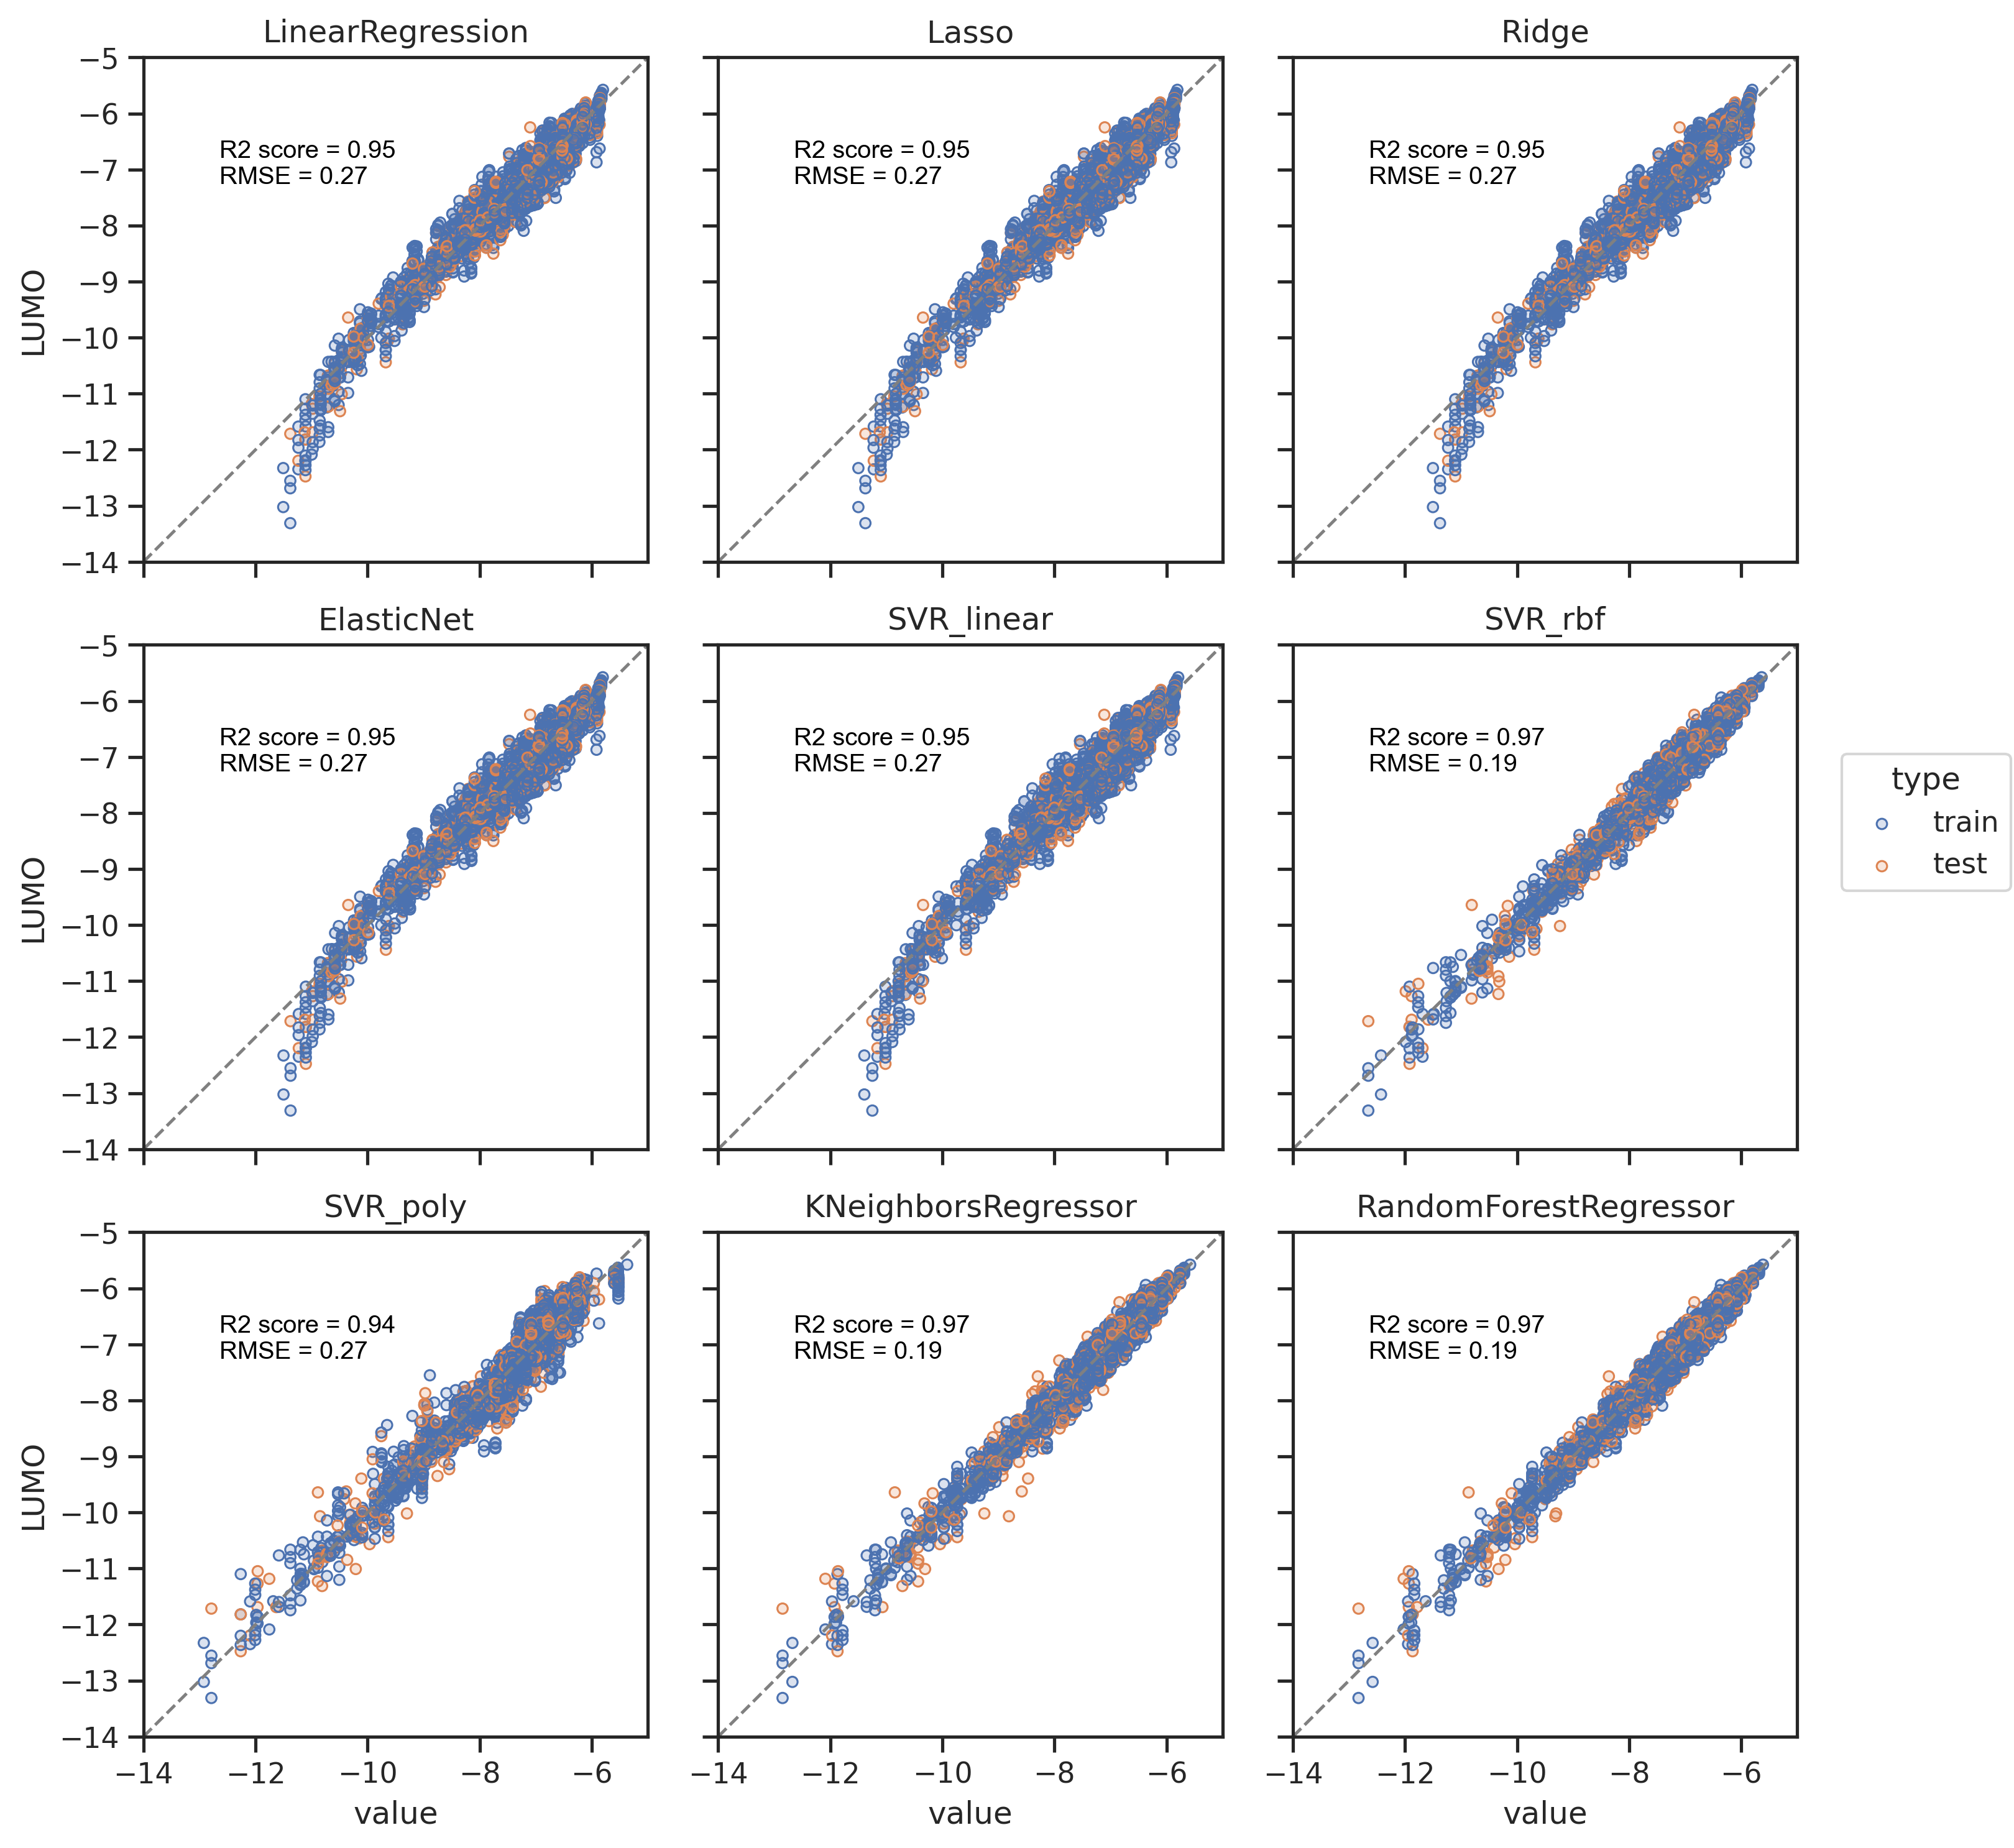

In [46]:
target='LUMO'
fig = plt.figure(figsize=(10, 10))
#subfigure = fig.subfigures(1, 1)
(
    so.Plot(data=pd.melt(LUMO_prediction_df, id_vars=[target,'type']),
        x='value', y=target, color='type')
        .facet(col='variable',wrap=3)
        .add(so.Dots())
        .limit(x=axis_range[target], y=axis_range[target])
        .layout(engine='tight')
        .theme(axes_style("ticks"))
        .on(fig)
        .plot()
        )
    
for axis_index in range(len(fig.axes)):
    ax = fig.axes[axis_index]
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    sns.lineplot(x=axis_range[target], y=axis_range[target],ax=ax,ls='--',color='grey')
    text_position_x = axis_range[target][0] + 0.15 * (axis_range[target][1] - axis_range[target][0])
    text_position_y = axis_range[target][0] + 0.75 * (axis_range[target][1] - axis_range[target][0])
    r2_score = model_accuracy_df.loc[axis_index*2+1, 'R2_score']
    rmse = model_accuracy_df.loc[axis_index*2+1, 'RMSE']
    text_to_display = 'R2 score = ' + "{:.2f}".format(r2_score) + '\nRMSE = ' + "{:.2f}".format(rmse)
    ax.text(x=text_position_x, y=text_position_y, s=text_to_display)

#fig.savefig('../rawfigures/LUMO_model_predictions.svg')

### Feature importance (normalized coefficient)

In [4]:
feature_importance_df = pd.read_csv(result_dir + "feature_importance.csv")
feature_importance_df

,Model_name,Target_type,ringcount,linkage_p,six_ring_p,primaryamine,linker_length,linker_position,hetero_nitrogen,fluorination,furan,pyrrole,sidechain_on_linker,sidechain_on_backbone
0,LinearRegression,HOMO,1.089400,0.278963,0.010430,0.415247,0.327601,0.010267,-0.148472,0.000236,0.010077,0.092327,0.044146,0.119846
1,LinearRegression,LUMO,0.436710,0.383567,0.035347,0.582929,0.314683,-0.005377,-0.185080,-0.054991,0.005506,0.080973,0.048761,0.071374
2,Lasso,HOMO,1.087911,0.278126,0.008920,0.415105,0.326868,0.009860,-0.148090,-0.000000,0.008611,0.090861,0.042735,0.118508
3,Lasso,LUMO,0.434732,0.382487,0.033875,0.582955,0.313886,-0.003602,-0.184902,-0.054823,0.003961,0.079393,0.047161,0.069840
4,Ridge,HOMO,1.088655,0.279017,0.010472,0.415347,0.327464,0.010508,-0.148698,-0.000054,0.009958,0.092178,0.043898,0.119523
5,Ridge,LUMO,0.436038,0.382986,0.035030,0.582024,0.314574,-0.005111,-0.184877,-0.055018,0.005430,0.080766,0.048544,0.071150
6,ElasticNet,HOMO,1.087838,0.278594,0.009664,0.415233,0.327087,0.010307,-0.148469,-0.000000,0.009233,0.091444,0.043196,0.118868
7,ElasticNet,LUMO,0.435596,0.382871,0.034511,0.582682,0.314265,-0.004442,-0.184908,-0.054885,0.004725,0.080140,0.047926,0.070575
8,SVR_linear,HOMO,1.065005,0.259824,-0.009420,0.383712,0.309825,0.021585,-0.129068,-0.004776,0.014077,0.090574,0.036321,0.103059
9,SVR_linear,LUMO,0.435277,0.383703,0.038685,0.566118,0.309068,-0.001632,-0.172101,-0.059626,0.012443,0.067519,0.045866,0.064618


/var/folders/tn/23sfm0zs5f725m1tjsjgv1tc0000gn/T/ipykernel_10449/2559302312.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(COLUMNS_DICT['molecular_fingerprint_full_names'])


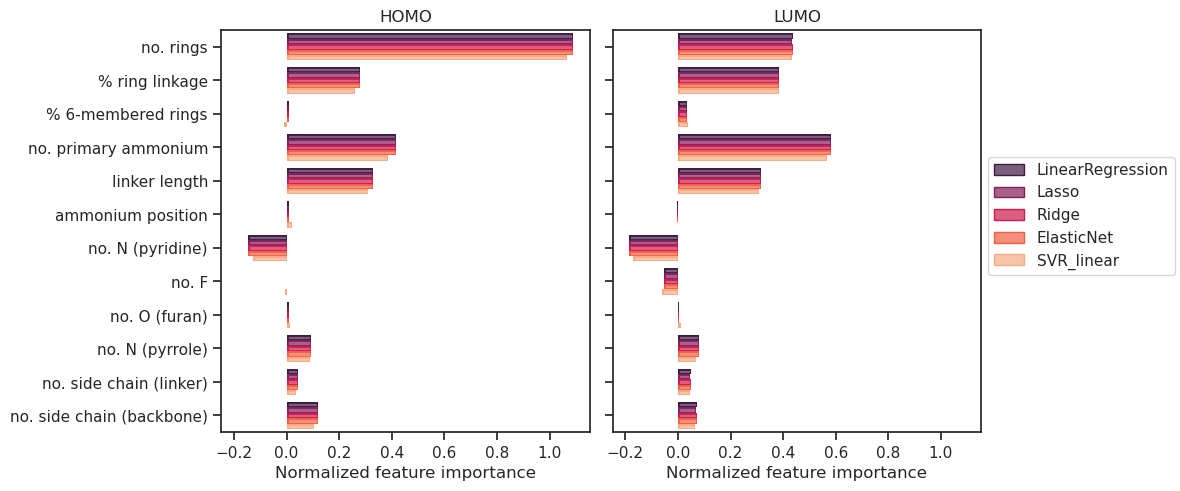

In [5]:
fig = plt.figure(figsize=(10, 5))
(
    so.Plot(
        data=pd.melt(feature_importance_df, id_vars=['Model_name','Target_type']),
        x='value', y='variable', color='Model_name')
    .facet(col='Target_type')
    .add(so.Bar(), so.Dodge())
    .scale(color='rocket')
    .label(color="", x="Normalized feature importance", y="")
    .theme(axes_style("ticks"))
    .on(fig)
    .plot()
)
ax = fig.axes[0]
ax.set_yticklabels(COLUMNS_DICT['molecular_fingerprint_full_names'])
fig.tight_layout()
fig.savefig('../rawfigures/feature_importance_comparison_linear_models.svg')

### Feature Importance (unnormalized coefficient)

In [24]:
unnormalized_coefficient_df = pd.read_csv(result_dir + "unnormalized_coefficient_lasso.csv", index_col=0)
unnormalized_coefficient_df

,ringcount,linkage_p,six_ring_p,primaryamine,linker_length,linker_position,hetero_nitrogen,fluorination,furan,pyrrole,sidechain_on_linker,sidechain_on_backbone,intercept
HOMO,1.336431,0.610077,0.027908,1.324668,0.526444,0.104415,-0.304780,0.000000,0.040971,0.427288,0.121480,0.238262,-19.232531
LUMO,0.534041,0.838995,0.105989,1.860305,0.505535,-0.038138,-0.380542,-0.110012,0.018849,0.373357,0.134062,0.140415,-13.612414


In [ ]:
import plotly.graph_objects as go
def polar_bar_plot_feature_importance(feature_importance_df, target, custom_order=COLUMNS_DICT['machine_learning_features']):
    
    sorted_values = [abs(feature_importance_df.loc[target, key]) for key in custom_order]

    fig = go.Figure()
    fig.update_layout(
        template=None,
    )
    colors = ['grey','green','gold','cornflowerblue']
    fig.add_trace(go.Barpolar(

        theta=custom_order,
        r=sorted_values,
        width = [1,1,1,1,1,1,1,1,1,1,1,1],
        marker_color=[colors[0],colors[0],colors[0],colors[1],colors[1],colors[1],colors[2],colors[2],colors[2],colors[2],colors[3],colors[3]],
        marker_line_color='black',
        marker_line_width=1,
        opacity=0.5

    ))
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                            visible=True,
                            range=[0, 2.0],
                            tickmode = 'array',
                            tickvals = [0, 0.4, 0.8, 1.2, 1.6, 2.0],
                        ),
            angularaxis=dict(
                tickvals=custom_order,  # Custom tick values (in degrees)
                ticktext=COLUMNS_DICT['molecular_fingerprint_full_names'],  # Custom tick labels
                tickmode='array',  # Use array of tick values
            ),
                ),
    )

    return fig

In [29]:
fig_HOMO_shap_coeffcient = polar_bar_plot_feature_importance(unnormalized_coefficient_df, target='HOMO')
fig_HOMO_shap_coeffcient#.write_image('../rawfigures/HOMO_unnormalized_coefficient_polar.svg')

In [31]:
fig_LUMO_shap_coeffcient = polar_bar_plot_feature_importance(unnormalized_coefficient_df, target='LUMO')
fig_LUMO_shap_coeffcient#.write_image('../rawfigures/LUMO_unnormalized_coefficient_polar.svg')